## Examen 3
1. Considere una matrix $A$, $3\times 3$ real, que se pueda diagonalizar con una transformación del  tipo
\begin{align}
  A_{\text{diag}}=P^T\cdot A \cdot U\,,
\end{align}
donde $P$ es una matrix de permutación ortogonal, es decir, de entradas 0 y $\pm 1$, y $U$ es una matriz de rotación en términos de tres ángulos de mezcla: $\theta_{12}$, $\theta_{23}$, $\theta_{13}$
\begin{align*}                                                                  
U=\begin{bmatrix}                                                                 
c_{12}c_{13}                    &s_{12}c_{13}                & s_{13}  \\       
-s_{12}c_{23}-c_{12}s_{23}s_{13}  & c_{12}c_{23}-s_{12}s_{23}s_{13}& s_{23}c_{13}\\                            s_{12}s_{23}-c_{12}c_{23}s_{13}  &-c_{12}s_{23}-s_{12}c_{23}s_{13}& c_{23}c_{13}\\ 
\end{bmatrix}                                                                   
\end{align*}
donde $c_{12}=\cos\theta_{12}$, etc. Construya una función de python, que acepte como entrada una matrix, y entrege como salida los tres autovectores ordenados de mayor a menor y los tres ángulos de mezcla en grados.  Aplique dicha función sobre la matrix:
```
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )
```
3. Grafique el espacio de configuración elongación-velocidad, de una masa $m=1\ $Kg  en el extremo de un resorte de constante elástica $k=1\ $N/m sometida a una fuerza de fricción proporcional a velocidad con coeficiente de fricción $b=1/3\ $N$\cdot$s/m. Considere elongaciónes iniciales en el intervalo $-1\ $m a $1\ $m y velocidades iniciales entre $-1\ $m/s y $1\ $m/s

In [3]:
import numpy as np
import scipy.integrate as integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


2) Espacio de configuracion elongacion-velocidad

Se define la funcion que describe las ecuaciones del movimiento 

In [2]:
def dU_dt(U,t,m=1.,k=1.,b=1/3.):
    x,v=U
    return [v, (-k*x)/m -(b*v)/m]

Se definen las condiciones inciales para la posicion y la velocidad dentro del rango establecido de -1 a 1, junto con un tiempo maximo en segundos

In [3]:
x0s=-1+np.random.random(100)*2
v0s=-1+np.random.random(100)*2

tmax=30 #segundos

Se escribe un ciclo en el que se resuelven las ecuaciones diferenciales iterando en cada condicion inicial antes descrita y se grafica el espacio de configuracion elongacion-velocidad con los resultados

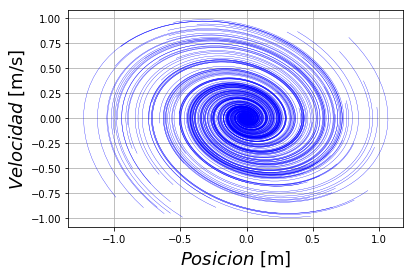

In [4]:
for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    U0=[x0,v0]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.3,color='blue')
    
plt.xlabel( "$Posicion$ [m]", fontsize = 18 )
plt.ylabel( "$Velocidad$ [m/s]", fontsize = 18 )
plt.grid()

1) Matriz A 3x3

Se define la funcion que realiza el proceso matricial pedido

In [4]:
def f(M):
    
    #se encuentran las matrices P y U
    
    λ1,P = np.linalg.eig(np.dot(M,M.transpose()))
    λ2,U = np.linalg.eig(np.dot(M.transpose(),M))
    
    #se reordena de mayor a menor
    index1=np.abs(λ1).argsort()[::-1]
    index2=np.abs(λ2).argsort()[::-1]
    UU=np.hstack( [ np.reshape( U[:,i], (3,1) ) for i in index2   ] )
    PP=np.hstack( [ np.reshape( P[:,i], (3,1) ) for i in index1   ] )
    
    #se calcula la matriz Adiag
    Adiag=np.dot( np.dot( PP.transpose(), A ), UU).round(10)
    
    #se igualan las entradas de las matrices U para hallar los angulos
    s13=UU[0,2]
    θ13=np.arcsin(s13)
    c13=np.cos(θ13)
    θ12=np.arcsin(UU[0,1]/c13)
    θ23=np.arcsin(UU[1,2]/c13)
    
    print("Los angulos de mezcla son: \nθ13= {}° \nθ12= {}° \nθ23= {}°".format(np.rad2deg(θ13), np.rad2deg(θ12), np.rad2deg(θ23)))
    return Adiag, UU[:,0], UU[:,1], UU[:,2]

Se define la matriz A con la que se va a trabajar

In [5]:
A=np.array( [
 [7.778162746217654799e+00, -7.662363998929994757e+00,  1.337296616780795588e+00],
 [2.121317112604814703e+00,  2.088449805848296759e+00, -3.720095646918017973e-01],
 [6.981313463593235256e-03,  6.945916527427932197e-01,  3.939225012258420922e+00]] )

Se aplica la funcion antes definida a la matriz A

In [6]:
f(A)

Los angulos de mezcla son: 
θ13= -44.999912733626° 
θ12= 0.14142121263962465° 
θ23= -79.90000015230834°


(array([[ 11.,   0.,   0.],
        [  0.,   4.,  -0.],
        [  0.,  -0.,  -3.]]),
 array([ 0.7071057 , -0.69657855,  0.12157242]),
 array([ 0.00174533,  0.17364791,  0.98480625]),
 array([-0.7071057 , -0.69614994,  0.12400319]))